In [136]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection
import os
import pandas as pd
from scipy import integrate
from sympy import diff
import glob
import scipy
import seaborn as sns
current_palette = sns.color_palette("muted")
import matplotlib as mpl
from pylab import cm
import matplotlib.font_manager


plt.style.use('default')
plt.rcParams.update({'figure.figsize':(5.425197, 4.0688),
                     'text.usetex': False,
                     'font.family': 'sans',
                     'font.sans-serif': 'Linux Biolinum',
                     'font.size': 14,
                     'mathtext.fontset': 'custom',
                     'mathtext.rm': 'Linux Biolinum',
                     'mathtext.it': 'Linux Biolinum:italic',
                     'mathtext.bf': 'Linux Biolinum:bold',
                     'lines.linewidth': 2.5,
                     'xtick.labelsize': 18,
                     'ytick.labelsize': 18,
                     'axes.titlesize': 18,
                     'axes.labelsize': 18,
                     'legend.frameon': True,
                     'legend.fancybox': True,
                     'legend.fontsize': 9,
                     'legend.framealpha': 0,
                     'legend.handletextpad': 0.5,
                     'legend.labelspacing': 0.2,
                     'legend.borderpad': 0.5,
                     'legend.loc': 'best',
                     'savefig.dpi': 600,
                     'pdf.compression': 9})

In [137]:
save_fig = '/Users/smoluakov/Documents/DIPLOMA/DATA_PROCCESING/CD7031/IMAGES/EPR'

In [138]:
directory = '/Users/smoluakov/Documents/DIPLOMA/EPR_DATA/06.04_CD208/POST_SPINOZA/GENERATION'
list_of_files = sorted(os.listdir(directory))

data = pd.read_excel(directory+'/'+'generation_full.xlsx')

In [139]:
data

,X (500 points),Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,...,Y26,Y27,Y28,Y29,Y30,Y31,Y32,Y33,Y34,Y35
0,329.484985,0.000354,0.010469,0.000000e+00,0.325387,0.000000,0.150378,0.393210,0.428862,0.062654,...,0.749277,0.879685,1.404646,1.052194,0.218746,0.705391,1.440039,0.296244,0.462198,1.047933
1,329.509033,0.000398,0.011617,-4.281056e+01,0.353649,-23.661583,0.165014,0.428333,0.466819,0.069460,...,0.816205,0.957521,1.523287,1.144407,0.240893,0.769290,1.561670,0.325509,0.505902,1.138950
2,329.533081,0.000447,0.012884,-7.848969e+01,0.384218,-39.785007,0.180998,0.466413,0.507942,0.076969,...,0.888768,1.041840,1.651332,1.244219,0.265167,0.838647,1.692942,0.357513,0.553512,1.237402
3,329.557159,0.000501,0.014286,-1.016939e+02,0.417316,-44.938900,0.198471,0.507737,0.552538,0.085263,...,0.967511,1.133266,1.789654,1.352355,0.291796,0.913995,1.834749,0.392543,0.605423,1.343994
4,329.581207,0.000562,0.015831,-1.112193e+02,0.453044,-40.003784,0.217515,0.552448,0.600756,0.094394,...,1.052709,1.232105,1.938640,1.469163,0.320920,0.995612,1.987489,0.430771,0.661856,1.459059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,341.388794,-0.001539,-0.005555,8.916632e+01,-0.116290,7.803651,-0.063985,-0.178941,-0.304365,-0.021785,...,-0.340978,-0.282118,-0.398077,-0.237805,-0.073597,-0.241670,-0.408107,-0.092545,-0.151416,-0.374519
496,341.412842,-0.001379,-0.004990,8.068935e+01,-0.106470,13.346018,-0.058068,-0.163635,-0.279088,-0.019551,...,-0.311812,-0.257788,-0.364892,-0.217129,-0.066484,-0.220466,-0.374087,-0.083762,-0.137603,-0.342896
497,341.436890,-0.001234,-0.004480,6.253988e+01,-0.097444,12.438858,-0.052676,-0.149580,-0.255813,-0.017539,...,-0.285031,-0.235465,-0.334350,-0.198174,-0.060033,-0.201043,-0.342775,-0.075779,-0.124999,-0.313824
498,341.460938,-0.001105,-0.004021,3.420224e+01,-0.089148,7.554440,-0.047765,-0.136680,-0.234390,-0.015726,...,-0.260449,-0.214992,-0.306251,-0.180805,-0.054185,-0.183260,-0.313967,-0.068529,-0.113503,-0.287108


In [140]:
x = data['X (500 points)']
y_full = data.drop(['X (500 points)'], axis=1)
y_names = list(y_full.columns)
time = np.linspace(0,43,35)

In [141]:
time

array([ 0.        ,  1.26470588,  2.52941176,  3.79411765,  5.05882353,
        6.32352941,  7.58823529,  8.85294118, 10.11764706, 11.38235294,
       12.64705882, 13.91176471, 15.17647059, 16.44117647, 17.70588235,
       18.97058824, 20.23529412, 21.5       , 22.76470588, 24.02941176,
       25.29411765, 26.55882353, 27.82352941, 29.08823529, 30.35294118,
       31.61764706, 32.88235294, 34.14705882, 35.41176471, 36.67647059,
       37.94117647, 39.20588235, 40.47058824, 41.73529412, 43.        ])

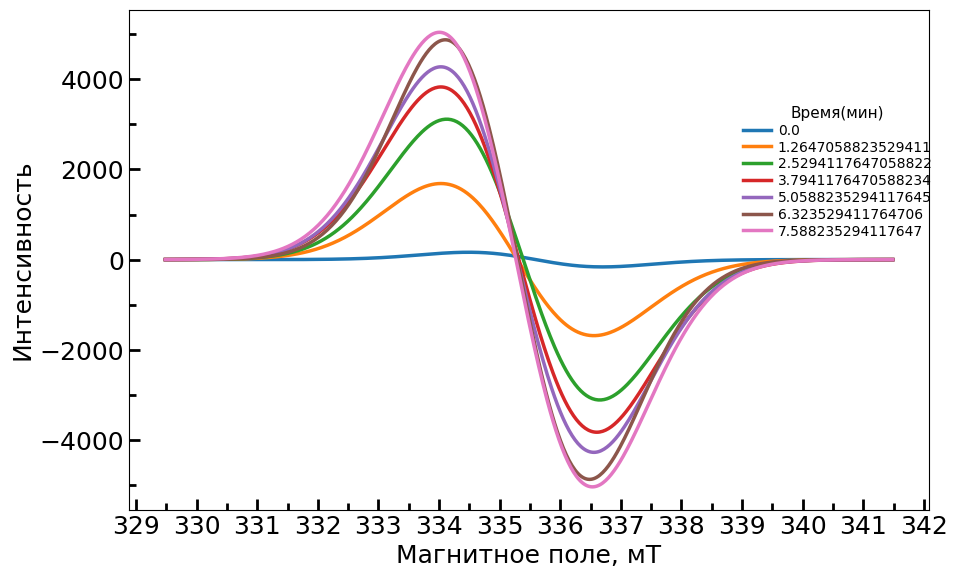

In [142]:
from statsmodels.nonparametric.smoothers_lowess import lowess
import seaborn as sns

fig = plt.figure(figsize=(8,5))
ax = plt.gca()
ax = fig.add_axes([0,0,1,1])

#plt.figure(figsize=(8,5))
plt.xlabel('Magnetic Field')
plt.ylabel('Intensity')
#plt.vlines(335.38, -7500,7500)
#plt.vlines(335.17, -4500,4500)

ax.xaxis.set_tick_params(which='major', size=8, width=2, direction='in', bottom='on')
ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', bottom='on')
ax.yaxis.set_tick_params(which='major', size=8, width=2, direction='in', left='on')
ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', left='on')


ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))

ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(2000))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(1000))

ax.set_xlabel('Магнитное поле, мТ')
ax.set_ylabel('Интенсивность')
y_full = data.drop(['X (500 points)','Y3', 'Y5', "Y6",'Y10'], axis=1)
y_names = list(y_full.columns)

for i,name in enumerate(y_names[:-18:2]):
    filtered = lowess(y_full[name][:], x[:], is_sorted=True, frac=0.0000001, it=2)
    ax.plot(filtered[:,0], filtered[:,1],label=time[i])
    #plt.plot(x, y_full[name], label=name) # посчитал в экселе сколько между 335.17 и 335.38 точек
    ax.legend(title="Время(мин)",fontsize =10,title_fontsize=11, bbox_to_anchor=(0.75, 0.515))
    
#plt.savefig('generation.png', bbox_inches='tight')
plt.show()

#plt.plot(x, y_full[y_names[10]], 'r')
#plt.plot(filtered[:,0], filtered[:,1], 'b')

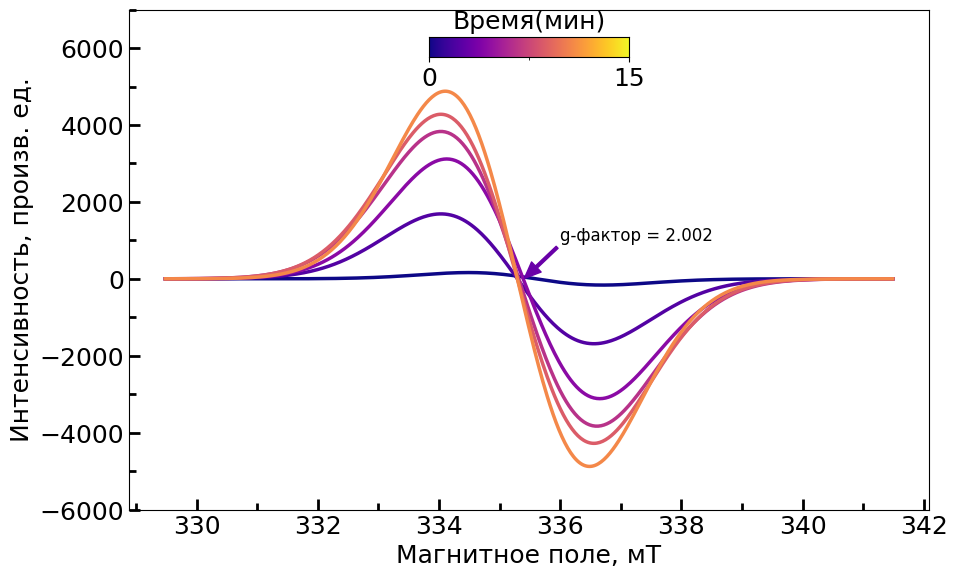

In [144]:
from statsmodels.nonparametric.smoothers_lowess import lowess
import seaborn as sns


from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    """Return a grayscale version of the given colormap"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # convert RGBA to perceived grayscale luminance
    # cf. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
        
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)
    

def view_colormap(cmap):
    """Plot a colormap with its grayscale equivalent"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    
    fig, ax = plt.subplots(2, figsize=(6, 2),
                           subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

fig = plt.figure(figsize=(8,5))
ax = plt.gca()
ax = fig.add_axes([0,0,1,1])

#plt.figure(figsize=(8,5))
plt.xlabel('Magnetic Field')
plt.ylabel('Intensity')
#plt.vlines(335.38, -7500,7500)
#plt.vlines(335.17, -4500,4500)

ax.xaxis.set_tick_params(which='major', size=8, width=2, direction='in', bottom='on')
ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', bottom='on')
ax.yaxis.set_tick_params(which='major', size=8, width=2, direction='in', left='on')
ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', left='on')


ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(2))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))

ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(2000))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(1000))

ax.set_xlabel('Магнитное поле, мТ')
ax.set_ylabel('Интенсивность, произв. ед.')
#ax.set_yticks([])


for i,name in enumerate(y_names[0:-19:2]):
    #if i ==5:
    #    continue
    filtered = lowess(y_full[name][:], x[:], is_sorted=True, frac=0.00000000000005, it=0)
    ax.plot(filtered[:,0], filtered[:,1],color=cm.plasma(i/7),label=time[i])
    #ax.legend(title="Время(мин)",fontsize =7,title_fontsize=9,bbox_to_anchor=(0.85, 0.5)) 
ax.set_ylim([-6000, 7000])
ax.annotate('g-фактор = 2.002 ', xy=(335.4, 0), xytext=(336, 1000.7),
            arrowprops=dict(color=cm.plasma(50),width=2,headwidth=10, shrink=0.01), fontsize=12)
    
cmap = plt.cm.get_cmap('plasma')
colors = cmap(np.arange(cmap.N))   
cmap = grayscale_cmap(cmap)
grayscale = cmap(np.arange(cmap.N))    
#plt.savefig('relaxation.png', bbox_inches='tight')
newax = fig.add_axes([0.375, 0.745, 0.25, 0.2], anchor='NE')
newax.imshow([colors],origin='upper', extent=[0, 15, 0.5, 2],)    
newax.axes.get_yaxis().set_visible(False)
#newax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', left='on')
newax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(7.5))
newax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(7.5))
newax.set_xticks([0,15])
newax.set_title('Время(мин)')
#plt.plot(x, y_full[y_names[10]], 'r')
#plt.plot(filtered[:,0], filtered[:,1], 'b')

plt.savefig(save_fig+'/colored_generation.pdf', bbox_inches='tight')

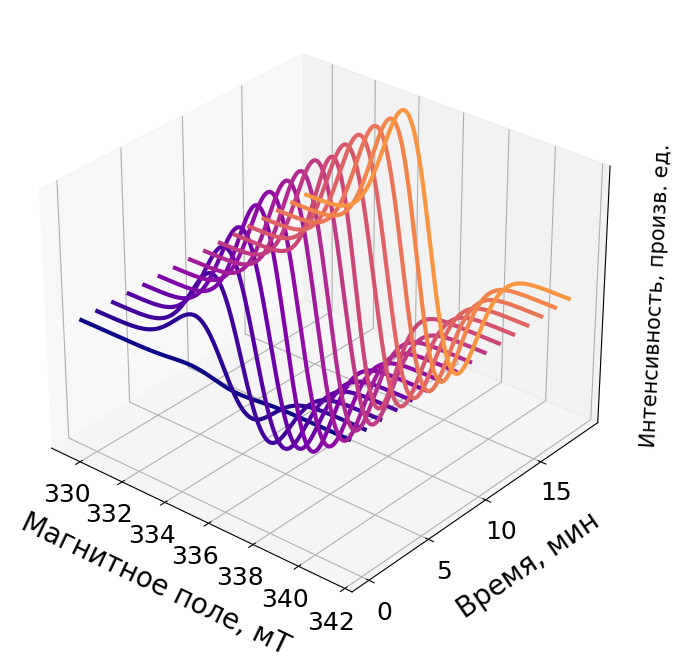

In [147]:
from matplotlib.collections import PolyCollection

fig = plt.figure(figsize=(8,8))
verts = []
ax = fig.add_subplot(projection='3d')


#for name in y_names:
ax.view_init(30, -50)
for i,name in enumerate(y_names[::2]):
    filtered = lowess(y_full[name], x, is_sorted=True, frac=0.00125, it=2)
    ax.plot(filtered[:498,0], [time[i]]*len(x[:498]),filtered[:498,1],color=cm.plasma(i/20),label=name, linewidth=3)

ax.set_xlabel('Магнитное поле, мT', fontsize=20,labelpad=15)
ax.set_ylabel('Время, мин',fontsize=20,labelpad=15)
ax.set_zlabel('Интенсивность, произв. ед.',fontsize=15, labelpad=1);

ax.set_zticks([])
plt.savefig(save_fig+'/generation_3d_withot_zaxis.pdf', bbox_inches='tight')

# Relaxation

In [148]:
directory_2 = '/Users/smoluakov/Documents/DIPLOMA/EPR_DATA/06.04_CD208/POST_SPINOZA/RELAXATION'
list_of_files_2 = sorted(os.listdir(directory_2))
data_2 = pd.read_excel(directory_2+'/'+'relaxation_full.xlsx')

In [149]:
data_2

,X (500 points),Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9
0,329.484985,0.973382,1.765061,0.683898,1.173857,0.653650,0.896569,0.542560,1.082488,0.661587
1,329.509033,1.056779,1.908165,0.744145,1.273006,0.711232,0.974069,0.591708,1.173918,0.719846
2,329.533081,1.146895,2.062128,0.809392,1.380013,0.773592,1.057867,0.645055,1.272596,0.782932
3,329.557159,1.244358,2.227928,0.880118,1.495608,0.841191,1.148555,0.703010,1.379194,0.851307
4,329.581207,1.349460,2.405955,0.956560,1.620114,0.914251,1.246414,0.765787,1.494009,0.925197
...,...,...,...,...,...,...,...,...,...,...
495,341.388794,-0.456813,-0.525072,-0.408868,-0.332671,-0.390784,-0.269924,-0.185883,-0.306777,-0.178115
496,341.412842,-0.419199,-0.482910,-0.374770,-0.304939,-0.358194,-0.247039,-0.169574,-0.281204,-0.162691
497,341.436890,-0.384540,-0.443975,-0.343386,-0.279415,-0.328198,-0.226009,-0.154635,-0.257666,-0.148546
498,341.460938,-0.352615,-0.408033,-0.314510,-0.255933,-0.300600,-0.206691,-0.140957,-0.236012,-0.135579


In [150]:
x_2 = data_2['X (500 points)']
y_full_2 = data_2.drop(['X (500 points)'], axis=1)
y_names_2 = list(y_full_2.columns)
time_2 = np.linspace(17,60,9)

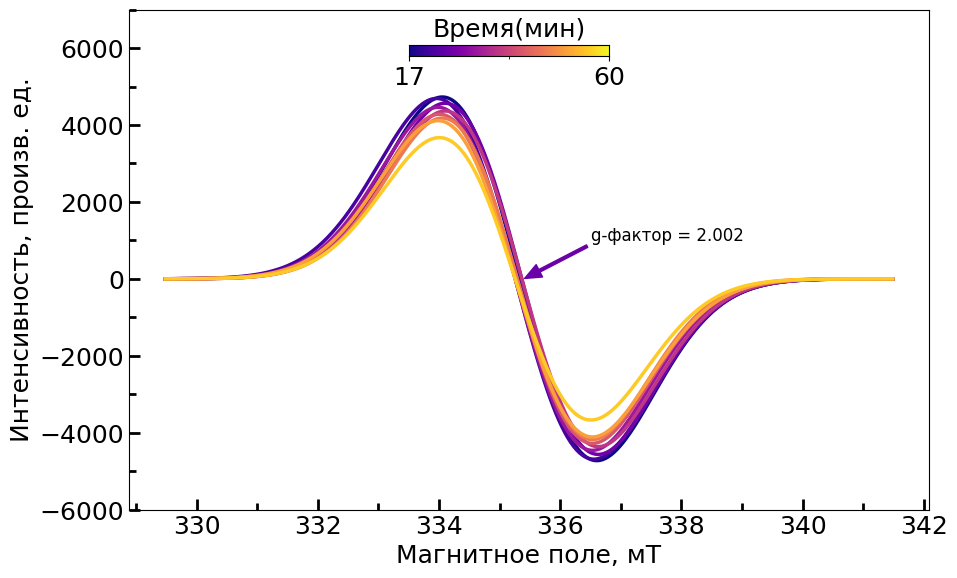

In [153]:
from statsmodels.nonparametric.smoothers_lowess import lowess

fig = plt.figure(figsize=(8,5))
ax = plt.gca()
ax = fig.add_axes([0,0,1,1])

#plt.figure(figsize=(8,5))
plt.xlabel('Magnetic Field')
plt.ylabel('Intensity')
#plt.vlines(335.38, -7500,7500)
#plt.vlines(335.17, -4500,4500)

ax.xaxis.set_tick_params(which='major', size=8, width=2, direction='in', bottom='on')
ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', bottom='on')
ax.yaxis.set_tick_params(which='major', size=8, width=2, direction='in', left='on')
ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', left='on')


ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(2))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))

ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(2000))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(1000))

ax.set_xlabel('Магнитное поле, мТ')
ax.set_ylabel('Интенсивность, произв. ед.')
#ax.set_yticks([])


for i,name in enumerate(y_names_2[0:]):
    #if i ==5:
    #    continue
    filtered = lowess(y_full_2[name][:], x_2[:], is_sorted=True, frac=0.00125, it=2)
    ax.plot(filtered[:,0], filtered[:,1],color=cm.plasma(i/9),label=time[i])
    #ax.legend(title="Время(мин)",fontsize =7,title_fontsize=9,bbox_to_anchor=(0.85, 0.5)) 
ax.set_ylim([-6000, 7000])
ax.annotate('g-фактор = 2.002 ', xy=(335.4, 0), xytext=(336.5, 1000.7),
            arrowprops=dict(color=cm.plasma(50),width=2,headwidth=10, shrink=0.01), fontsize=12)
    
cmap = plt.cm.get_cmap('plasma')
colors = cmap(np.arange(cmap.N))   
cmap = grayscale_cmap(cmap)
grayscale = cmap(np.arange(cmap.N))    
newax = fig.add_axes([0.35, 0.73, 0.25, 0.2], anchor='NE')
newax.imshow([colors],origin='upper', extent=[17, 60, 0.5, 3],)    
newax.axes.get_yaxis().set_visible(False)
#newax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', left='on')
newax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(38.5))
newax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(38.5))
newax.set_xticks([17,60])
newax.set_title('Время(мин)')
#plt.plot(x, y_full[y_names[10]], 'r')
#plt.plot(filtered[:,0], filtered[:,1], 'b')

plt.savefig(save_fig+'/relaxaxtion_colored.pdf', bbox_inches='tight')

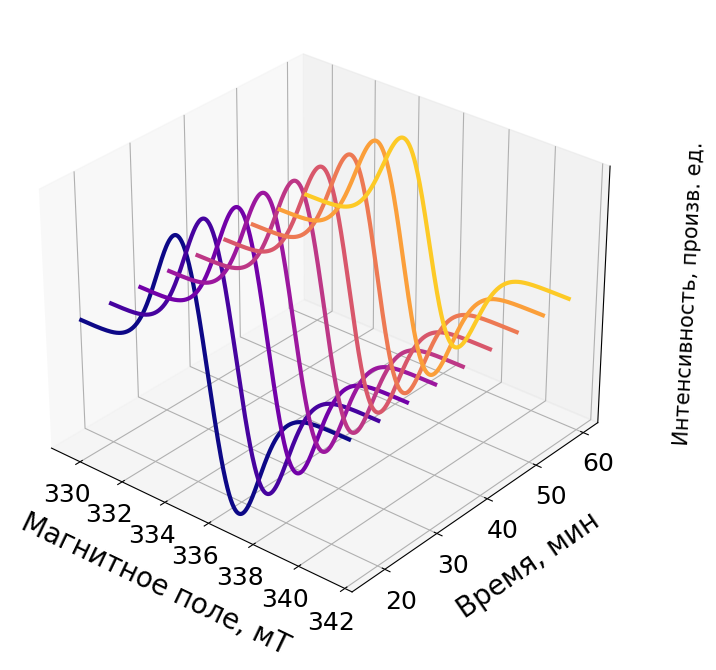

In [154]:
from matplotlib.collections import PolyCollection


fig = plt.figure(figsize=(8,8))
verts = []
ax = fig.add_subplot(projection='3d')
#for name in y_names:
ax.view_init(30, -50)
for i,name in enumerate(y_names_2[:]):
    filtered = lowess(y_full_2[name], x_2, is_sorted=True, frac=0.00125, it=2)
    ax.plot(filtered[:498,0], [time_2[i]]*len(x_2[:498]),filtered[:498,1],color=cm.plasma(i/9),label=name, linewidth=3)
    #ax.plot(x_2[6:-21],  [i]*len(x_2[6:-21]),y_full_2[name][6:-21],)

ax.set_xlabel('Магнитное поле, мT', fontsize=20,labelpad=15)
ax.set_ylabel('Время, мин',fontsize=20,labelpad=15)
ax.set_zlabel('Интенсивность, произв. ед.',fontsize=15, labelpad=15);
ax.set_zticks([])

plt.savefig(save_fig+'/relaxation_3d_withot_zaxis.pdf', bbox_inches='tight')

In [102]:
path = "/Users/smoluakov/Documents/DIPLOMA/EPR_DATA/06.04_CD208/POST_SPINOZA/double_integration/double_integration_full.xlsx"
data = pd.read_excel(path)

In [103]:
doub_int = []
for column in data.columns[1:]:
    doub_int.append(np.max(data[column]))

In [104]:
doub_int[:]

[31602.04296875,
 32546.396484375,
 29949.123046875,
 29813.814453125,
 28624.47265625,
 28072.998046875,
 26391.041015625,
 27493.1953125,
 23631.62890625]

In [105]:
time_2 = np.linspace(17,60,9)

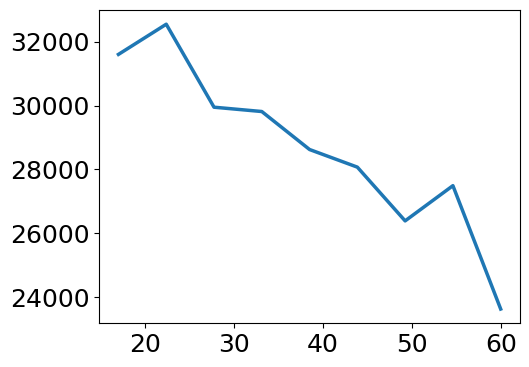

In [106]:
plt.plot(time_2, doub_int)

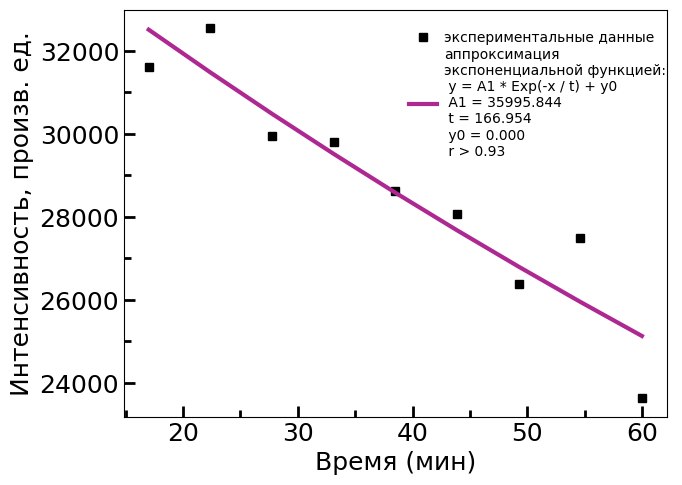

In [155]:
def exponenial_func_1(x, a, b, c):
    return a*np.exp(x/(-b))+c

popt, pcov = scipy.optimize.curve_fit(exponenial_func_1, time_2, doub_int,bounds=(0, [250000, 1000, 10000000]))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.xaxis.set_tick_params(which='major', size=8, width=2, direction='in', bottom='on')
ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', bottom='on')
ax.yaxis.set_tick_params(which='major', size=8, width=2, direction='in', left='on')
ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', left='on')

ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(5))

ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(2000))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(1000))

ax.set_xlabel('Время (мин)')
ax.set_ylabel('Интенсивность, произв. ед.')
#ax.set_yticks([])

ax.plot(time_2,doub_int,'s',markersize=6,markerfacecolor='black',markeredgecolor='black',label='экспериментальные данные')
ax.plot(time_2, exponenial_func_1(time_2, *popt),linewidth= 3, color=cm.plasma(100),
        label='аппроксимация\nэкспоненциальной функцией:\n y = A1 * Exp(-x / t) + y0 \n A1 = %5.3f\n t = %5.3f\n y0 = %5.3f\n r > 0.93' % tuple(popt))    

#ax.text(10,0.25,'(б)',fontsize=25)
#ax.set_title('Кинетика изменения оптической плотности в полосе поглощения дикатион-радикала в процессе анодной поляризации', pad=14, fontsize=20 )
ax.legend(bbox_to_anchor=(0.5, 0.6),fontsize =10,title_fontsize=12)
plt.savefig(save_fig+'/expfit_relax_rus_color_emptyY.pdf', transparent=False, bbox_inches='tight') 
plt.show()

In [114]:
my_rho = np.corrcoef(doub_int, exponenial_func_1(t, *popt))

In [115]:
my_rho

array([[1.        , 0.93615888],
       [0.93615888, 1.        ]])